In [1]:
import numpy as np
import torch as th
from torch.autograd import Variable
from collections import defaultdict as ddict
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [21]:
model.keys()

dict_keys(['model', 'epoch', 'objects'])

In [22]:
model['objects']

['systematists',
 'shovelfuls',
 'insufferableness',
 'jolthead',
 'shopwoman',
 'tea-room',
 'suitabilities',
 'teamed',
 'jesuitically',
 'sprechery',
 'Alfonzo',
 'steam-ship',
 'intellectualize',
 'root',
 'insisting',
 'hornpout',
 'Benjamin',
 'inanimateness',
 'hypnotizable',
 'carelessly',
 'Facebooks',
 'Blackwell',
 'Cirebon',
 'carrot',
 'CatalinaIsland',
 'Boardgaming',
 'Boadicea',
 'Chandleresque',
 'fictions',
 'feedest',
 'extra-uterine',
 'extrapolates',
 'motivating',
 'mille-feuilles',
 'postalservice',
 'mitigation',
 'parody',
 'nonindependence',
 'justest',
 'operant',
 'lemon-yellow',
 'longitudes',
 'legendarium',
 'lionizes',
 'pantheress',
 'plushier',
 'pleonastically',
 'physicalization',
 'phytates',
 'otoscopes',
 'metamorphoser',
 'papadam',
 'mailbags',
 'pleocytosis',
 'logograms',
 'nirvana',
 'koeksisters',
 'merging',
 'oathbreakers',
 'pacable',
 'omniform',
 'phosphorite',
 'perciform',
 'ananke',
 'Odonata',
 'Liebfraumilch',
 'Madeiran',
 'Geyser

In [6]:
embed = model['model']['lt.weight'].numpy()
print(embed.shape)

(179, 2)


### Plot graphs with features

(179, 2)


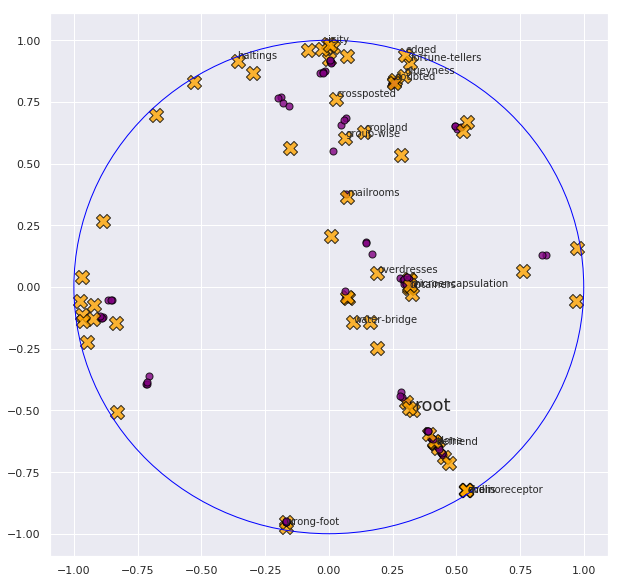

In [16]:
model = th.load('../data/synth_instances.pth')
embed = model['model']['lt.weight'].numpy()
print(embed.shape)
colors = np.zeros(embed.shape[0])
for idx in range(len(colors)):
    if model['objects'][idx]['feature'] == -1:
        colors[idx] = 1
    else:
        colors[idx] = -1

plt.figure(figsize=(10,10))
ax = plt.gca()
for idx in range(len(colors)):
    x = embed[idx,0]
    y = embed[idx,1]
    
    if model['objects'][idx]['feature'] == -1:
        fsize = 10
        size = 200
        displacement = 1.01
        marker = 'X'
        color = 'orange'
    else:
        fsize = 7
        size = 200
        displacement = -1.01
        marker = '.'
        color= 'purple'
    ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker=marker)
    if model['objects'][idx]['feature'] == -1 and (np.random.random() > 0.7 or model['objects'][idx]['name'] == 'root'):
        #print(x,y)
        if model['objects'][idx]['name'] == 'root': fsize = 18
        plt.text(x * ( displacement), y * ( displacement) , model['objects'][idx]['name'], fontsize=fsize)

ax.add_artist(plt.Circle((0,0), 1, color='Blue',fill=False))
plt.show()

### Plot simple graphs without features

(201, 5)


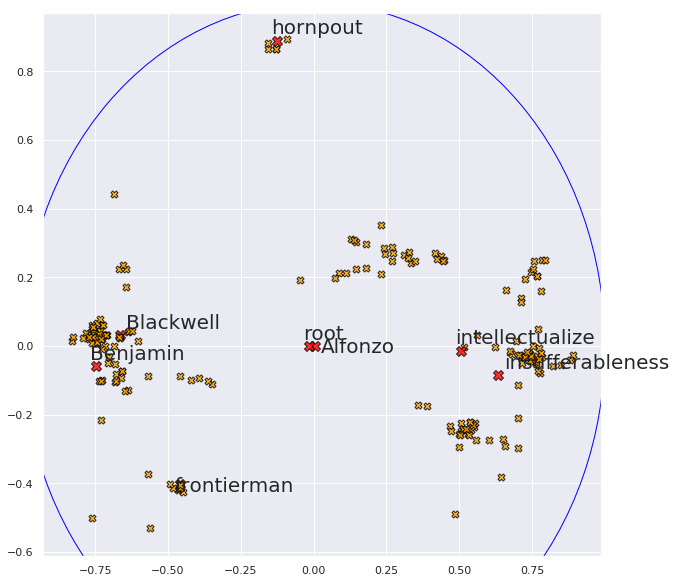

In [81]:
np.random.seed(77)
model = th.load('../data/synth_simple.pth')
embed = model['model']['lt.weight'].numpy()
print(embed.shape)
colors = np.zeros(len(model['objects']))
plt.figure(figsize=(10,10))
ax = plt.gca()
for idx in range(len(colors)):
    x = embed[idx,2]
    y = embed[idx,4]
    
    fsize = 20
    size = 200
    displacement = np.zeros(2)
    marker = 'X'
    color = 'orange'

    rootest = ['root','Alfonzo', 'Benjamin' , 'insufferableness', 'hornpout', 'frontierman', 'Blackwell', 'intellectualize'] #, 'foliar', , 62, 63, 96, 53]
    if model['objects'][idx] in rootest:
        displacement+= np.sign(np.random.random(2) - 0.5) * 0.02
        size = 100
        color='red'
        ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker=marker)

        plt.text(x + ( displacement[0]), y + ( displacement[1]) , model['objects'][idx], fontsize=fsize)

    else:
        size=50
        ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker=marker)

ax.add_artist(plt.Circle((0,0), 1, color='Blue',fill=False))
plt.show()